In [34]:
import pandas as pd

# Specify the path to your data file
data_file_path = "C:\\Users\\jalad\\Downloads\\heart+disease\\processed.cleveland.data"
df_heart_d = pd.read_csv(data_file_path, header=None)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_heart_d.columns = column_names
output_file_path = "C:\\Users\\jalad\\Documents\\heart_disease.csv"
df_heart_d.to_csv(output_file_path, index=False)
print(f"File saved successfully at {output_file_path}")

File saved successfully at C:\Users\jalad\Documents\heart_disease.csv


In [35]:
print(df_heart_d.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


In [36]:
# Checking for missing values
missing = df_heart_d.isnull().sum()
print("Missing values in each column:")
print(missing)


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [37]:
# Checking for duplicate values
duplicate_rows = df_heart_d[df_heart_d.duplicated()]
num_duplicates = df_heart_d.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)
if num_duplicates > 0:
    print("Duplicate rows:")
    print(duplicate_rows)



Number of duplicate rows: 0


In [38]:
print(df_heart_d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


In [39]:
unique_v = df_heart_d['num'].unique()
print(unique_v)

[0 2 1 3 4]


In [40]:
import pandas as pd
import numpy as np

# Convert ca and thal columns to numeric and replacing invalid values with NaN
df_heart_d['ca'] = pd.to_numeric(df_heart_d['ca'], errors='coerce')
df_heart_d['thal'] = pd.to_numeric(df_heart_d['thal'], errors='coerce')

# Checking if there are any NaN values now
print(df_heart_d.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [41]:
# Filling missing values in ca and thal with the median or mode for categorical values
df_heart_d['ca'] = df_heart_d['ca'].fillna(df_heart_d['ca'].median())
df_heart_d['thal'] = df_heart_d['thal'].fillna(df_heart_d['thal'].mode()[0])
print(df_heart_d.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [42]:
df_heart_d.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [43]:
print(df_heart_d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


In [44]:
# counting the values 
print(df_heart_d['num'].value_counts())


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


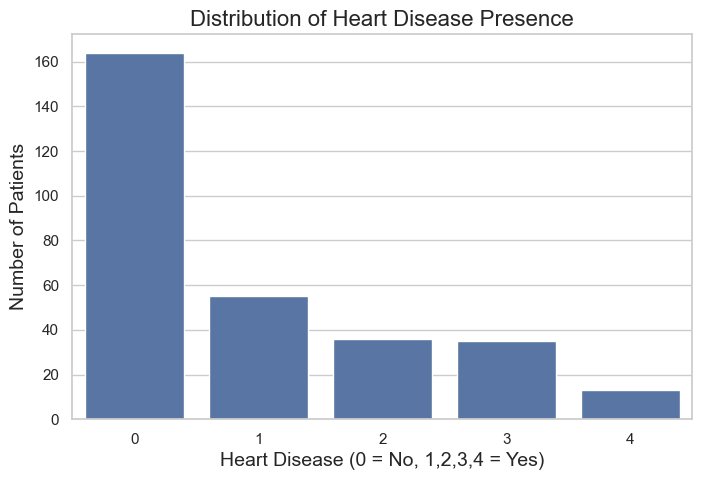

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# Count plot for the num column
plt.figure(figsize=(8, 5))
sns.countplot(x='num', data=df_heart_d, legend=False)  
plt.title('Distribution of Heart Disease Presence', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1,2,3,4 = Yes)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show()


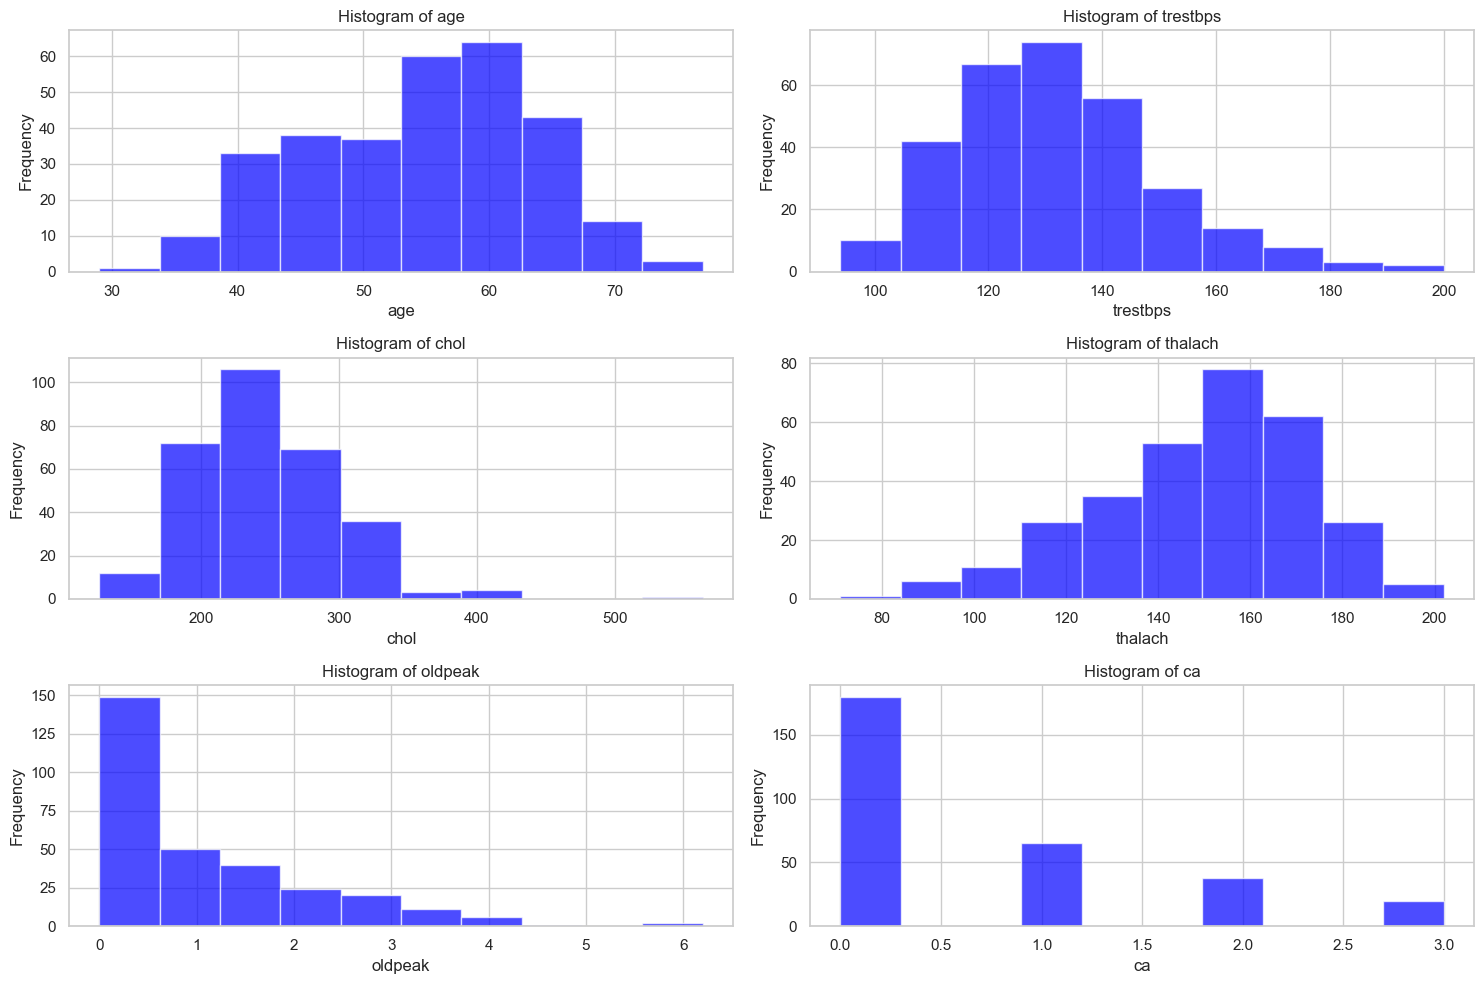

In [46]:
# histogram for numerical values
import matplotlib.pyplot as plt
int_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(int_features, 1):
    plt.subplot(3, 2, i)  # Adjust the layout as needed
    plt.hist(df_heart_d[feature], bins=10, color='blue', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


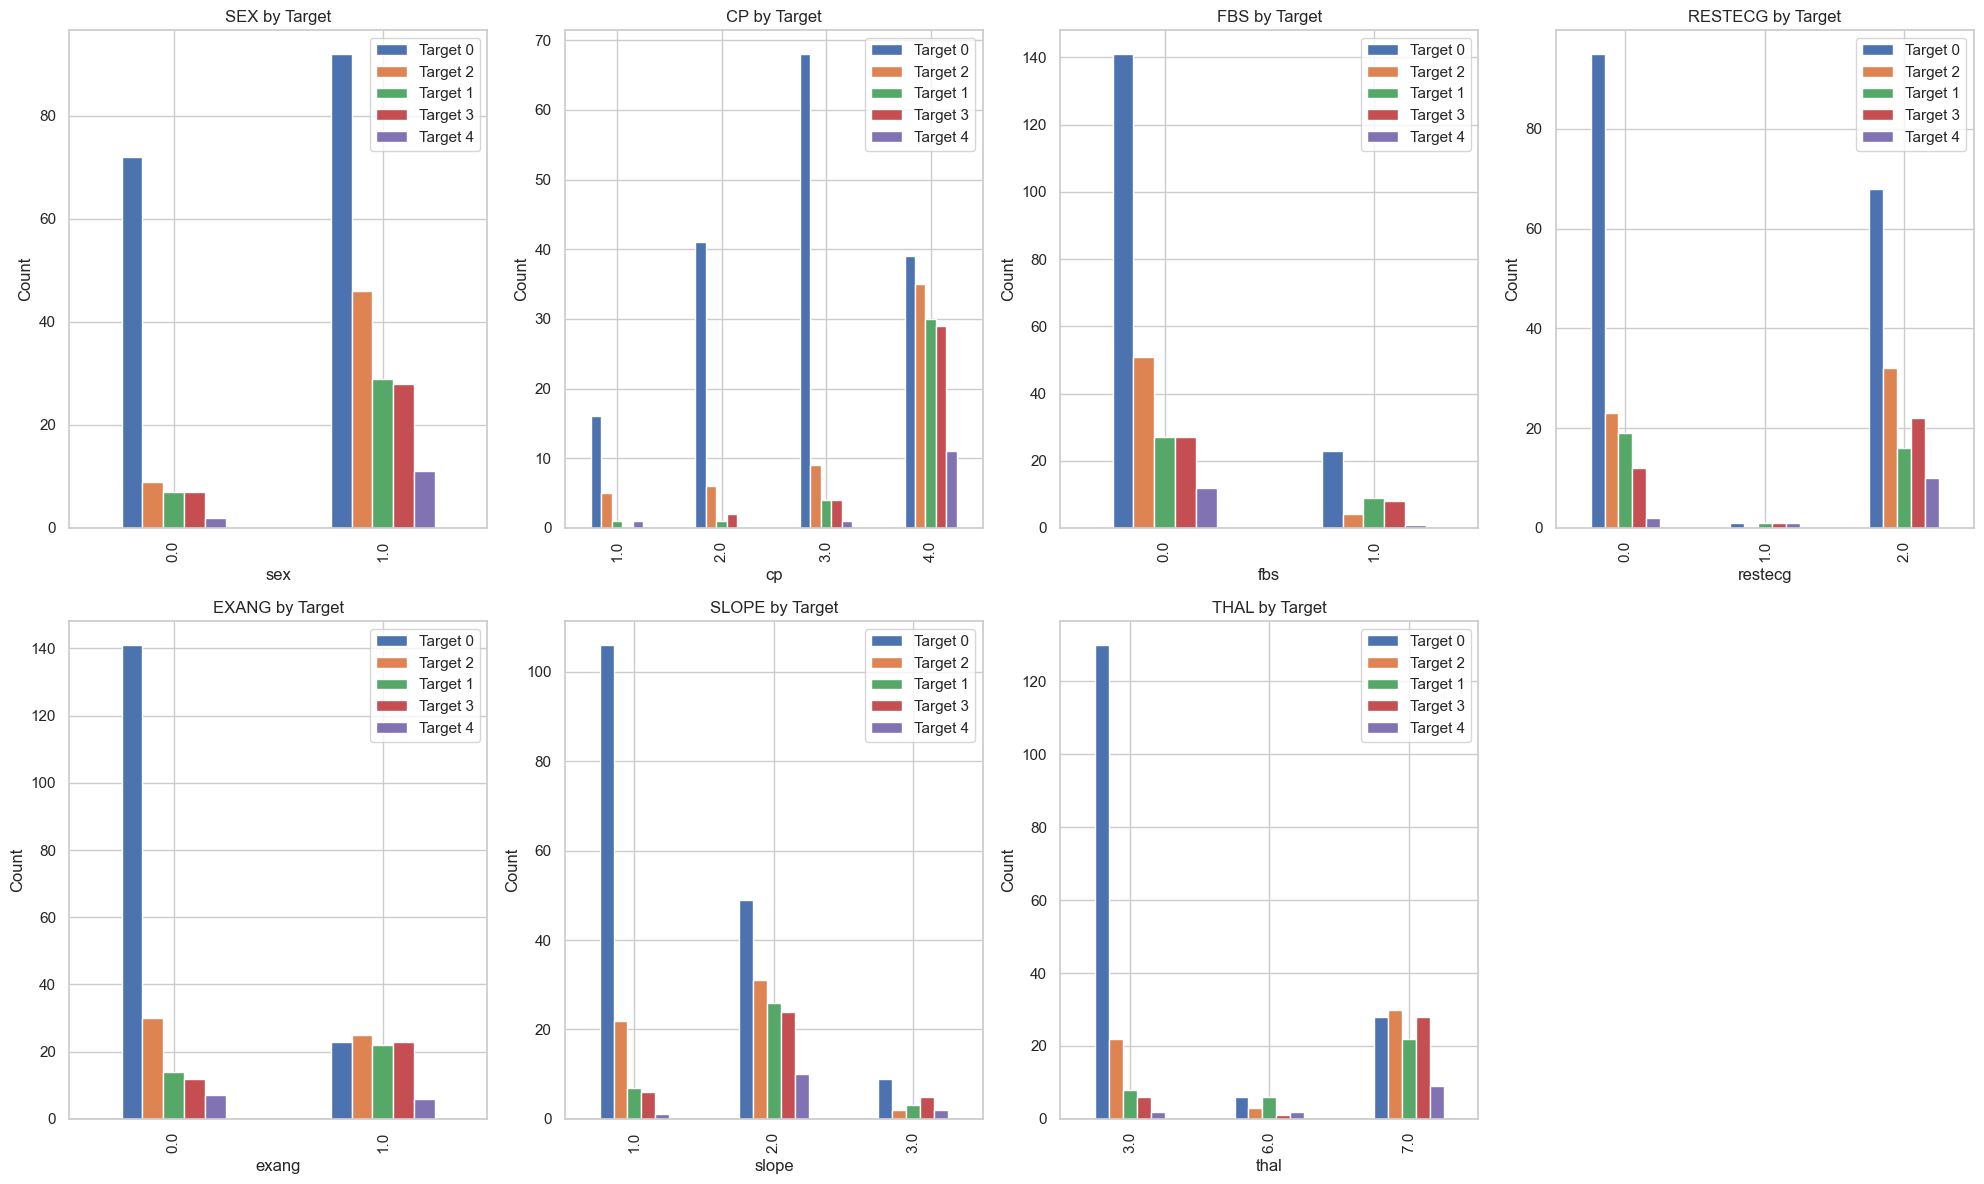

In [47]:
# Bar plots for each categorical variable by target
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.ravel()

categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


for i, var in enumerate(categorical_vars):
    
    df_heart_d.groupby([var, 'num']).size().unstack().plot(kind='bar', ax=axes[i])
    
    
    axes[i].set_title(f"{var.upper()} by Target")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")
    
    
    axes[i].legend([f'Target {cls}' for cls in df_heart_d['num'].unique()])


fig.delaxes(axes[-1])  

plt.tight_layout()
plt.show()


slope    oldpeak    0.577537
oldpeak  slope      0.577537
num      ca         0.520968
ca       num        0.520968
num      thal       0.507155
thal     num        0.507155
num      oldpeak    0.504092
oldpeak  num        0.504092
num      thalach    0.415040
thalach  num        0.415040
dtype: float64


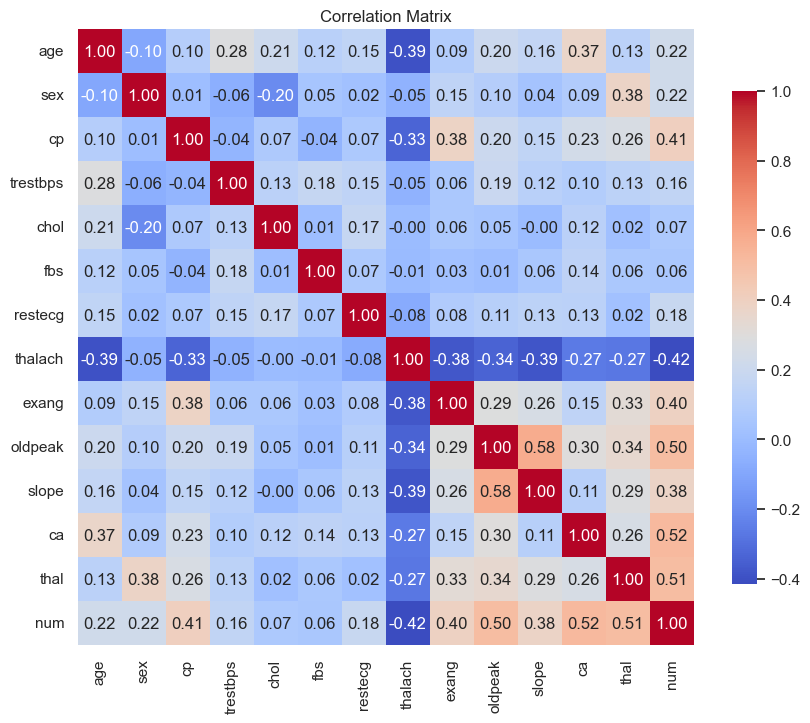

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculating the correlation matrix
correlation_matrix = df_heart_d.corr()


correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]


sorted_correlations = correlation_pairs.abs().sort_values(ascending=False)


top_correlations = sorted_correlations[:10]  # Display the top 10 correlations
print(top_correlations)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


In [49]:
import pandas as pd


# Creating dummy variables for the specified columns
col_to_dummy = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_heart_d = pd.get_dummies(df_heart_d, columns=col_to_dummy)
df_heart_d = df_heart_d.astype(int)


print(df_heart_d.head())


   age  trestbps  chol  thalach  oldpeak  num  sex_0.0  sex_1.0  cp_1.0  \
0   63       145   233      150        2    0        0        1       1   
1   67       160   286      108        1    2        0        1       0   
2   67       120   229      129        2    1        0        1       0   
3   37       130   250      187        3    0        0        1       0   
4   41       130   204      172        1    0        1        0       0   

   cp_2.0  ...  slope_1.0  slope_2.0  slope_3.0  ca_0.0  ca_1.0  ca_2.0  \
0       0  ...          0          0          1       1       0       0   
1       0  ...          0          1          0       0       0       0   
2       0  ...          0          1          0       0       0       1   
3       0  ...          0          0          1       1       0       0   
4       1  ...          1          0          0       1       0       0   

   ca_3.0  thal_3.0  thal_6.0  thal_7.0  
0       0         0         1         0  
1       1     

In [50]:
from sklearn.model_selection import train_test_split
X = df_heart_d.drop('num', axis=1)  
y = df_heart_d['num']  
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [51]:
from sklearn.preprocessing import StandardScaler
# Specify the columns to scale
to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Creating a StandardScaler instance
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])
print("Scaled training set shape:", X_train.shape)
print("Scaled testing set shape:", X_test.shape)


Scaled training set shape: (242, 28)
Scaled testing set shape: (61, 28)


In [52]:
# Printing the scaled values for the training and testing set
print("Scaled training set values for specified columns:")
print(X_train[to_scale].head()) 
print("\nScaled testing set values for specified columns:")
print(X_test[to_scale].head())  


Scaled training set values for specified columns:
          age  trestbps      chol   thalach   oldpeak
97   0.594945  1.020911  0.169014  0.307680  1.142677
82  -1.711319  0.463338  1.327117  1.411752 -0.713215
167 -0.063987  0.017280  0.720492  0.396006 -0.713215
288  0.155657 -0.094234 -0.511143  0.572657 -0.713215
71   1.363700 -0.373021  0.095483  0.572657 -0.713215

Scaled testing set values for specified columns:
          age  trestbps      chol   thalach   oldpeak
219  0.485123  0.351824  0.407987  1.411752 -0.713215
271  1.253878  1.578483 -0.382464 -0.531414  1.142677
89  -0.393454 -0.094234  0.132248 -0.045623 -0.713215
101 -2.260429 -0.763321 -1.228064  1.058449 -0.713215
67  -0.063987  1.020911 -0.308934  0.660983  0.214731


In [53]:
from sklearn.feature_selection import SelectKBest, f_classif
# Feature Selection
k = 18
selector = SelectKBest(score_func=f_classif, k=k)
X_train_select = selector.fit_transform(X_train, y_train)
X_test_select = selector.transform(X_test)
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
# Displaying the selected features
print("Selected Features:")
print(selected_features.tolist())
# Converting the selected features back to DataFrame
X_train_df = pd.DataFrame(X_train_select, columns=selected_features)
X_test_df = pd.DataFrame(X_test_select, columns=selected_features)
X_train = X_train_df
X_test = X_test_df

Selected Features:
['age', 'thalach', 'oldpeak', 'sex_0.0', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_7.0']


In [54]:
print(X_train.head())

        age   thalach   oldpeak  sex_0.0  sex_1.0  cp_2.0  cp_3.0  cp_4.0  \
0  0.594945  0.307680  1.142677      1.0      0.0     0.0     0.0     1.0   
1 -1.711319  1.411752 -0.713215      0.0      1.0     0.0     1.0     0.0   
2 -0.063987  0.396006 -0.713215      1.0      0.0     1.0     0.0     0.0   
3  0.155657  0.572657 -0.713215      0.0      1.0     1.0     0.0     0.0   
4  1.363700  0.572657 -0.713215      0.0      1.0     0.0     0.0     1.0   

   exang_0.0  exang_1.0  slope_1.0  slope_2.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  \
0        1.0        0.0        0.0        1.0     0.0     0.0     1.0     0.0   
1        1.0        0.0        1.0        0.0     1.0     0.0     0.0     0.0   
2        0.0        1.0        1.0        0.0     0.0     1.0     0.0     0.0   
3        1.0        0.0        1.0        0.0     1.0     0.0     0.0     0.0   
4        1.0        0.0        0.0        1.0     0.0     0.0     1.0     0.0   

   thal_3.0  thal_7.0  
0       0.0       1.0  
1 

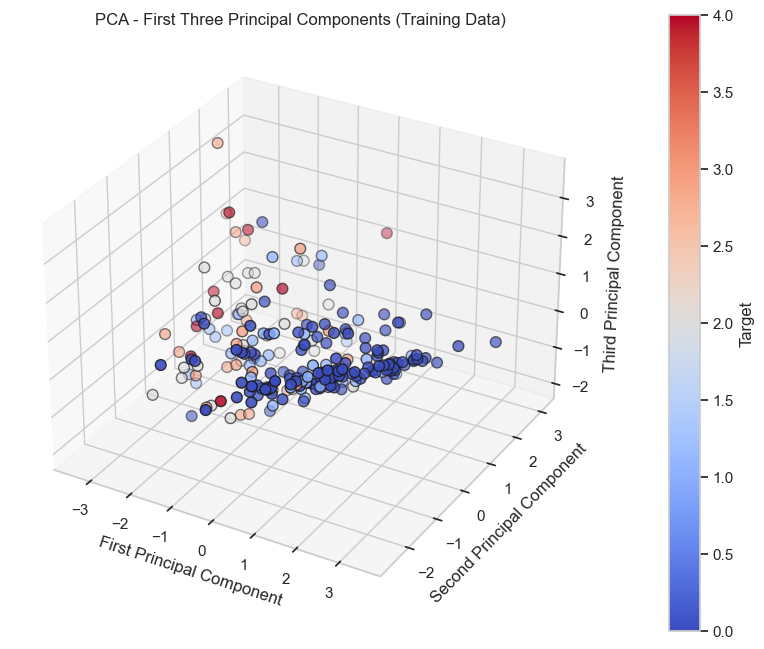

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
# Transforming the test data using the same PCA
X_test_pca = pca.transform(X_test)

from mpl_toolkits.mplot3d import Axes3D

# 3D plot of the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm', edgecolor='k', s=60)
ax.set_title('PCA - First Three Principal Components (Training Data)')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# Adding a color bar for clarity
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

plt.show()



In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf')
}

# Training each model and printing the confusion matrix
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")


Confusion Matrix for Logistic Regression:
[[31  2  0  0  0]
 [ 6  3  2  0  0]
 [ 0  3  0  4  0]
 [ 2  0  1  4  0]
 [ 0  1  1  1  0]]

Confusion Matrix for Decision Tree:
[[26  2  3  0  2]
 [ 3  3  2  3  0]
 [ 1  3  2  1  0]
 [ 1  1  2  2  1]
 [ 0  0  2  0  1]]

Confusion Matrix for Random Forest:
[[31  1  0  1  0]
 [ 3  4  0  3  1]
 [ 2  2  2  1  0]
 [ 0  2  3  1  1]
 [ 1  1  1  0  0]]

Confusion Matrix for KNN:
[[30  2  1  0  0]
 [ 7  2  1  1  0]
 [ 2  4  1  0  0]
 [ 2  3  2  0  0]
 [ 0  1  0  2  0]]

Confusion Matrix for SVC:
[[33  0  0  0  0]
 [ 8  0  1  2  0]
 [ 2  1  2  2  0]
 [ 1  1  4  1  0]
 [ 0  0  2  1  0]]


# 0 as one class and remaining all another set of class

In [66]:
# 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Converting multi-class to binary classification
    y_true_b = [0 if y == 0 else 1 for y in y_true]
    y_pred_b = [0 if y == 0 else 1 for y in y_pred]
    
    cm = confusion_matrix(y_true_b, y_pred_b)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true_b, y_pred_b)
    precision = precision_score(y_true_b, y_pred_b)
    recall = recall_score(y_true_b, y_pred_b)
    f1 = f1_score(y_true_b, y_pred_b)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1
    }

results = {}
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf')
}

# Training each model and calculate metrics
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    results[model_name] = calculate_metrics(y_test, y_pred)

# Converting the results to a list of dictionaries
results_list = []
for model_name, metrics in results.items():
    results_list.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'Specificity': metrics['Specificity'],
        'F1 Score': metrics['F1 Score']
    })

comparison_table = pd.DataFrame(results_list)
print(comparison_table)

  # Printing the confusion matrices for each model
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

                 Model  Accuracy  Precision    Recall  Specificity  F1 Score
0  Logistic Regression  0.836066   0.909091  0.714286     0.939394  0.800000
1        Decision Tree  0.803279   0.766667  0.821429     0.787879  0.793103
2        Random Forest  0.868852   0.916667  0.785714     0.939394  0.846154
3                  KNN  0.770492   0.850000  0.607143     0.909091  0.708333
4                  SVC  0.819672   1.000000  0.607143     1.000000  0.755556

Confusion Matrix for Logistic Regression:
[[31  2]
 [ 8 20]]

Confusion Matrix for Decision Tree:
[[26  7]
 [ 5 23]]

Confusion Matrix for Random Forest:
[[31  2]
 [ 6 22]]

Confusion Matrix for KNN:
[[30  3]
 [11 17]]

Confusion Matrix for SVC:
[[33  0]
 [11 17]]


## Treat class 1 as the negative class (0 in binary)
## Treat all other classes (0, 2, 3, 4) as the positive class (1 in binary)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Converting multi-class to binary classification 
    y_true_b = [0 if y == 1 else 1 for y in y_true]
    y_pred_b = [0 if y == 1 else 1 for y in y_pred]
    
    cm = confusion_matrix(y_true_b, y_pred_b)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true_b, y_pred_b)
    precision = precision_score(y_true_b, y_pred_b)
    recall = recall_score(y_true_b, y_pred_b)
    f1 = f1_score(y_true_b, y_pred_b)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1
        
    }


results = {}
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf')
}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    results[model_name] = calculate_metrics(y_test, y_pred)

results_list = []
for model_name, metrics in results.items():
    results_list.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'Specificity': metrics['Specificity'],
        'F1 Score': metrics['F1 Score']
        
    })

comparison_table = pd.DataFrame(results_list)
print(comparison_table)

for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

                 Model  Accuracy  Precision  Recall  Specificity  F1 Score
0  Logistic Regression  0.770492   0.846154    0.88     0.272727  0.862745
1        Decision Tree  0.770492   0.846154    0.88     0.272727  0.862745
2        Random Forest  0.786885   0.862745    0.88     0.363636  0.871287
3                  KNN  0.688525   0.816327    0.80     0.181818  0.808081
4                  SVC  0.786885   0.813559    0.96     0.000000  0.880734

Confusion Matrix for Logistic Regression:
[[ 3  8]
 [ 6 44]]

Confusion Matrix for Decision Tree:
[[ 3  8]
 [ 6 44]]

Confusion Matrix for Random Forest:
[[ 4  7]
 [ 6 44]]

Confusion Matrix for KNN:
[[ 2  9]
 [10 40]]

Confusion Matrix for SVC:
[[ 0 11]
 [ 2 48]]


In [59]:
## Treat class 2 as the negative class (0 in binary)
## Treat all other classes (0, 1, 3, 4) as the positive class (1 in binary)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Converting multi-class to binary classification 
    y_true_b = [0 if y == 2 else 1 for y in y_true]
    y_pred_b = [0 if y == 2 else 1 for y in y_pred]
    
    cm = confusion_matrix(y_true_b, y_pred_b)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true_b, y_pred_b)
    precision = precision_score(y_true_b, y_pred_b)
    recall = recall_score(y_true_b, y_pred_b)
    f1 = f1_score(y_true_b, y_pred_b)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
         'F1 Score': f1

    }


results = {}
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf')
}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    results[model_name] = calculate_metrics(y_test, y_pred)

results_list = []
for model_name, metrics in results.items():
    results_list.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'Specificity': metrics['Specificity'],
        'F1 Score': metrics['F1 Score']
        
    })

comparison_table = pd.DataFrame(results_list)
print(comparison_table)

for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

                 Model  Accuracy  Precision    Recall  Specificity  F1 Score
0  Logistic Regression  0.819672   0.877193  0.925926     0.000000  0.900901
1        Decision Tree  0.770492   0.900000  0.833333     0.285714  0.865385
2        Random Forest  0.852459   0.909091  0.925926     0.285714  0.917431
3                  KNN  0.836066   0.892857  0.925926     0.142857  0.909091
4                  SVC  0.803279   0.903846  0.870370     0.285714  0.886792

Confusion Matrix for Logistic Regression:
[[ 0  7]
 [ 4 50]]

Confusion Matrix for Decision Tree:
[[ 2  5]
 [ 9 45]]

Confusion Matrix for Random Forest:
[[ 2  5]
 [ 4 50]]

Confusion Matrix for KNN:
[[ 1  6]
 [ 4 50]]

Confusion Matrix for SVC:
[[ 2  5]
 [ 7 47]]


In [61]:
## Treat class 3 as the negative class (0 in binary)
## Treat all other classes (0, 1, 2, 4) as the positive class (1 in binary)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Converting multi-class to binary classification 
    y_true_b = [0 if y == 3 else 1 for y in y_true]
    y_pred_b = [0 if y == 3 else 1 for y in y_pred]
    
    cm = confusion_matrix(y_true_b, y_pred_b)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true_b, y_pred_b)
    precision = precision_score(y_true_b, y_pred_b)
    recall = recall_score(y_true_b, y_pred_b)
    f1 = f1_score(y_true_b, y_pred_b)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1

    }


results = {}
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf')
}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    results[model_name] = calculate_metrics(y_test, y_pred)

results_list = []
for model_name, metrics in results.items():
    results_list.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'Specificity': metrics['Specificity'],
        'F1 Score': metrics['F1 Score']
        
    })

comparison_table = pd.DataFrame(results_list)
print(comparison_table)

for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

                 Model  Accuracy  Precision    Recall  Specificity  F1 Score
0  Logistic Regression  0.868852   0.942308  0.907407     0.571429  0.924528
1        Decision Tree  0.852459   0.909091  0.925926     0.285714  0.917431
2        Random Forest  0.819672   0.890909  0.907407     0.142857  0.899083
3                  KNN  0.836066   0.879310  0.944444     0.000000  0.910714
4                  SVC  0.819672   0.890909  0.907407     0.142857  0.899083

Confusion Matrix for Logistic Regression:
[[ 4  3]
 [ 5 49]]

Confusion Matrix for Decision Tree:
[[ 2  5]
 [ 4 50]]

Confusion Matrix for Random Forest:
[[ 1  6]
 [ 5 49]]

Confusion Matrix for KNN:
[[ 0  7]
 [ 3 51]]

Confusion Matrix for SVC:
[[ 1  6]
 [ 5 49]]


## Treat class 4 as the negative class (0 in binary)
## Treat all other classes (0, 1, 2, 3) as the positive class (1 in binary)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Converting multi-class to binary classification 
    y_true_b = [0 if y == 4 else 1 for y in y_true]
    y_pred_b = [0 if y == 4 else 1 for y in y_pred]
    
    cm = confusion_matrix(y_true_b, y_pred_b)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true_b, y_pred_b)
    precision = precision_score(y_true_b, y_pred_b)
    recall = recall_score(y_true_b, y_pred_b)
    f1 = f1_score(y_true_b, y_pred_b)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
         'F1 Score': f1
    
    }


results = {}
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf')
}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    results[model_name] = calculate_metrics(y_test, y_pred)

results_list = []
for model_name, metrics in results.items():
    results_list.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'Specificity': metrics['Specificity'],
        'F1 Score': metrics['F1 Score']
        
    })

comparison_table = pd.DataFrame(results_list)
print(comparison_table)

for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

                 Model  Accuracy  Precision    Recall  Specificity  F1 Score
0  Logistic Regression  0.950820   0.950820  1.000000     0.000000  0.974790
1        Decision Tree  0.918033   0.964912  0.948276     0.333333  0.956522
2        Random Forest  0.918033   0.949153  0.965517     0.000000  0.957265
3                  KNN  0.950820   0.950820  1.000000     0.000000  0.974790
4                  SVC  0.950820   0.950820  1.000000     0.000000  0.974790

Confusion Matrix for Logistic Regression:
[[ 0  3]
 [ 0 58]]

Confusion Matrix for Decision Tree:
[[ 1  2]
 [ 3 55]]

Confusion Matrix for Random Forest:
[[ 0  3]
 [ 2 56]]

Confusion Matrix for KNN:
[[ 0  3]
 [ 0 58]]

Confusion Matrix for SVC:
[[ 0  3]
 [ 0 58]]
